In [216]:
import numpy as np
import pandas as pd
import pickle 
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [228]:
Song_DB = pd.read_csv('Song_DataBase.csv')

In [230]:
Song_DB.drop(['id'], axis=1, inplace=True)

In [231]:
# We will not use the 'target' key as we don't want to classify the wines in types.
# we just want to cluster them.
X = Song_DB                       

print()
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.669,0.698,-7.971,0.0713,0.02430,0.000000,0.0782,0.600,83.987,261707
1,0.544,0.897,-6.056,0.0471,0.24100,0.000000,0.1300,0.647,157.170,215133
2,0.514,0.942,-8.433,0.0502,0.28200,0.000066,0.1700,0.912,159.847,175267
3,0.527,0.835,-5.298,0.0433,0.01660,0.000000,0.2490,0.654,125.983,176658
4,0.767,0.881,-3.988,0.0301,0.00133,0.000139,0.0551,0.961,130.018,209800


## Scaling the features for effectivier visualization

In [232]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
#print()
#display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.669,0.698,-7.971,0.0713,0.02430,0.000000,0.0782,0.600,83.987,261707
1,0.544,0.897,-6.056,0.0471,0.24100,0.000000,0.1300,0.647,157.170,215133
2,0.514,0.942,-8.433,0.0502,0.28200,0.000066,0.1700,0.912,159.847,175267
3,0.527,0.835,-5.298,0.0433,0.01660,0.000000,0.2490,0.654,125.983,176658
4,0.767,0.881,-3.988,0.0301,0.00133,0.000139,0.0551,0.961,130.018,209800


In [233]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [235]:
#User_song SCALE
scaler.transform(Song_DB)

array([[ 0.47580899, -0.45172408, -0.53793957, ..., -0.03094567,
        -1.48906455,  0.54774774],
       [-0.38384842,  0.85843119,  0.13395475, ...,  0.1815758 ,
         1.25092747, -0.27607093],
       [-0.5901662 ,  1.15469745, -0.70003627, ...,  1.37983512,
         1.3511551 , -0.98123594],
       ...,
       [ 0.09755973, -0.51097733, -0.88353534, ..., -0.4695538 ,
        -1.26431055, -1.79373404],
       [ 0.83342647,  0.5950834 ,  0.85847788, ..., -0.415293  ,
        -0.06240268, -1.08251961],
       [ 0.29700025,  0.26589866, -0.06568382, ..., -0.11233687,
         0.01008171, -1.27109544]])

In [225]:
Song_DB

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.669,0.698,-7.971,0.0713,0.024300,0.000000,0.0782,0.600,83.987,261707
1,0.544,0.897,-6.056,0.0471,0.241000,0.000000,0.1300,0.647,157.170,215133
2,0.514,0.942,-8.433,0.0502,0.282000,0.000066,0.1700,0.912,159.847,175267
3,0.527,0.835,-5.298,0.0433,0.016600,0.000000,0.2490,0.654,125.983,176658
4,0.767,0.881,-3.988,0.0301,0.001330,0.000139,0.0551,0.961,130.018,209800
...,...,...,...,...,...,...,...,...,...,...
8267,0.547,0.932,-2.616,0.0431,0.004090,0.000036,0.0391,0.541,105.009,238254
8268,0.803,0.917,-4.902,0.0381,0.000237,0.526000,0.0791,0.618,124.011,389198
8269,0.614,0.689,-8.956,0.0418,0.012600,0.939000,0.1050,0.503,89.990,129333
8270,0.721,0.857,-3.991,0.0538,0.146000,0.000000,0.0923,0.515,122.092,169541


## Clustering with K-Means

In [321]:
kmeans = KMeans(n_clusters=15, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=15, random_state=1234)

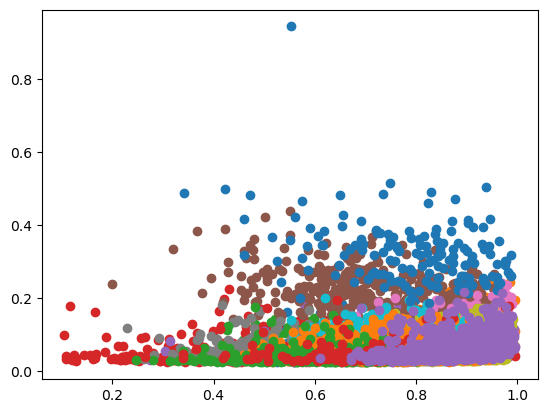

In [322]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [323]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      454
1      404
2      778
3      252
4      361
5      337
6      729
7      515
8     1164
9      639
10     154
11     905
12     428
13     187
14     965
dtype: int64

In [325]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.669,0.698,-7.971,0.0713,0.024300,0.000000,0.0782,0.600,83.987,261707,11
1,0.544,0.897,-6.056,0.0471,0.241000,0.000000,0.1300,0.647,157.170,215133,9
2,0.514,0.942,-8.433,0.0502,0.282000,0.000066,0.1700,0.912,159.847,175267,9
3,0.527,0.835,-5.298,0.0433,0.016600,0.000000,0.2490,0.654,125.983,176658,8
4,0.767,0.881,-3.988,0.0301,0.001330,0.000139,0.0551,0.961,130.018,209800,11
...,...,...,...,...,...,...,...,...,...,...,...
8267,0.547,0.932,-2.616,0.0431,0.004090,0.000036,0.0391,0.541,105.009,238254,14
8268,0.803,0.917,-4.902,0.0381,0.000237,0.526000,0.0791,0.618,124.011,389198,4
8269,0.614,0.689,-8.956,0.0418,0.012600,0.939000,0.1050,0.503,89.990,129333,4
8270,0.721,0.857,-3.991,0.0538,0.146000,0.000000,0.0923,0.515,122.092,169541,2


In [329]:
X[X['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
6500,0.769,0.751,-5.785,0.0731,0.0262,0.246,0.0985,0.276,99.983,232783,2


In [330]:
kmeans.inertia_

36947.605296140435

In [331]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

65506.22805852867


## Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

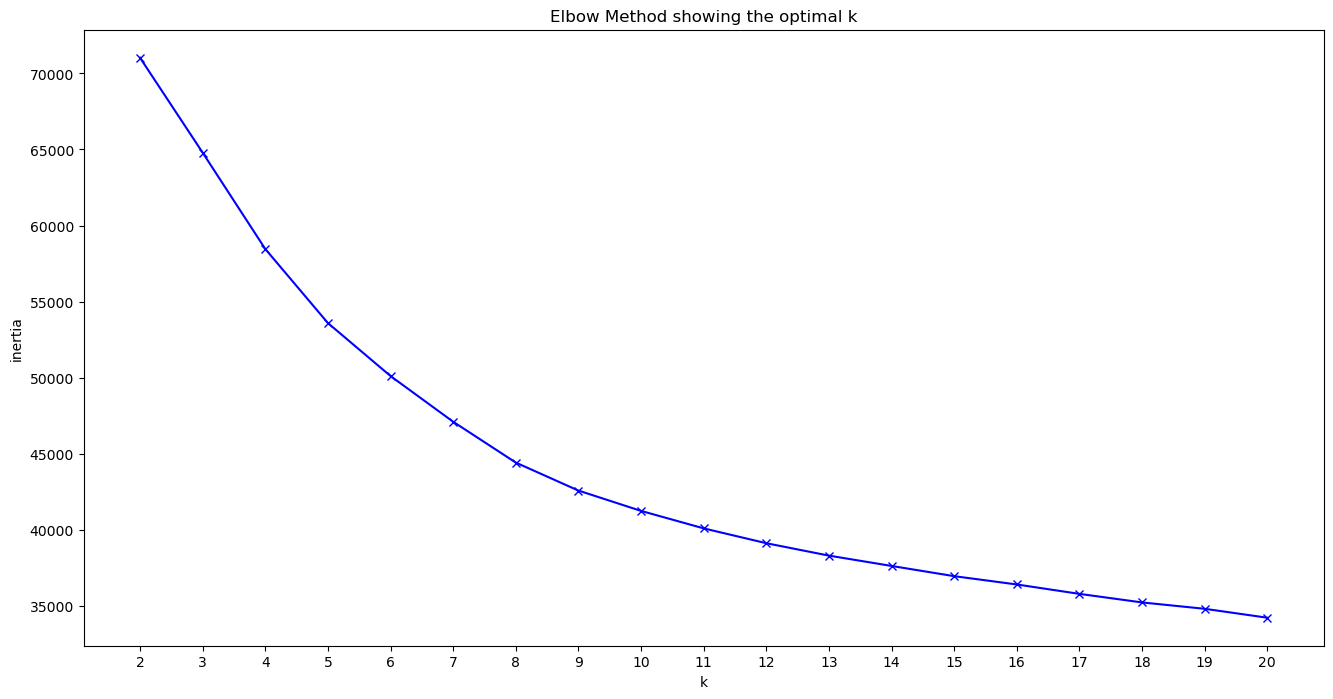

In [332]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

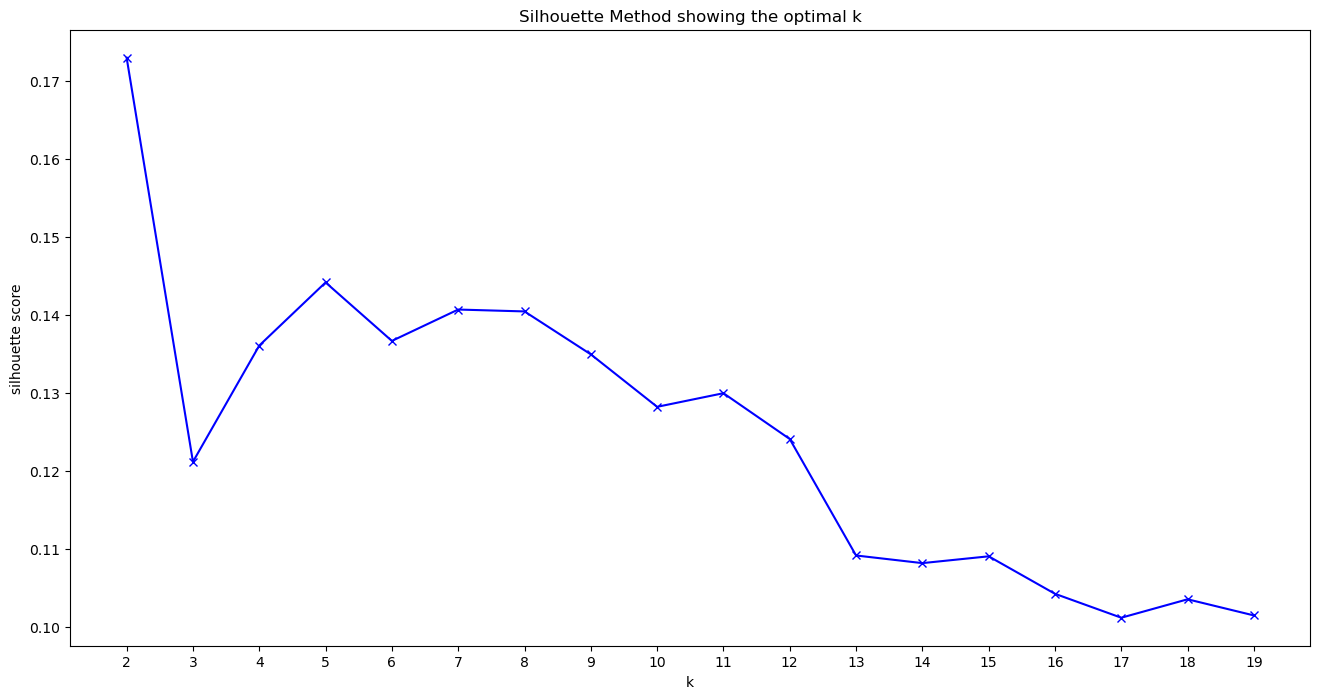

In [319]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')